In [11]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X, y = load_iris(return_X_y=True)

class_filter = y!=2
X = X[class_filter]
y = y[class_filter]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

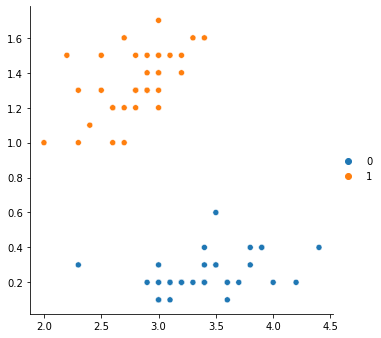

In [14]:
sns.relplot(kind='scatter', x=X_train[:,1], y=X_train[:,3], hue=y_train) # petal width, sepal width

In [15]:
m = SVC(probability=True).fit(X_train, y_train)
pred = m.predict(X_test)
print('예측', pred)
print('실제', y_test)
print('정답비율', m.score(X_test, y_test))

예측 [0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1]
실제 [0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1]
정답비율 1.0


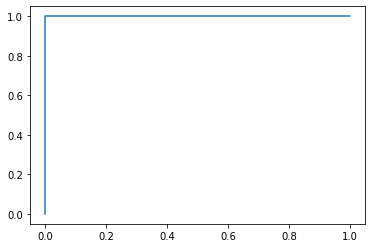

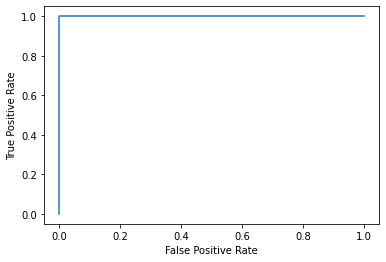

In [17]:
p = m.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, p[:, 1])
fpr_v, tpr_v, threshold = roc_curve(y_test,p[:,1])

_, axe = plt.subplots()
axe.plot(fpr, tpr)

RocCurveDisplay(fpr = fpr_v, tpr = tpr_v).plot()